<a href="https://colab.research.google.com/github/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/blob/main/Rudravelli_Bhargava_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import nltk; nltk.download('stopwords')
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.6 MB/s eta 0:00:00


In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import pandas as pd
import re

csv_url = "https://raw.githubusercontent.com/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/main/imdb_reviews.csv"

#Read the CSV file
df = pd.read_csv(csv_url)

#Function to clean reviews
def cleanreviews(reviews):
    reviews = re.sub(r'@[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'#[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'https?:\/\/\S+', '', reviews)
    reviews = re.sub(r"www.\S+", "", reviews)
    reviews = re.sub('[()!?]', ' ', reviews)
    reviews = re.sub('\[.*?\]', ' ', reviews)
    reviews = re.sub("[^A-Za-z0-9]", " ", reviews)
    reviews = re.sub('\\n', '', reviews)
    reviews = re.sub(r'[0-9]+', '', reviews)
    return reviews

# Apply the cleaning function to the 'review' column
df["review"] = df["review"].apply(cleanreviews)

# Convert the cleaned reviews to a list
data = df["review"].values.tolist()

# Print the first cleaned review as a check
print(data[:1])


['I had the rather intense privilege to view James Cameron s much anticipated   million budget return to the directing scene  Avatar  at the Empire Leicester Square in London Where to begin  The visuals in this pieces was groundbreaking  He did it with the Terminator series and then Titanic  so one would expect Cameron to deliver    and HE DID  The visual are by far some of the sharpest CGI I have seen  You could almost say that there is a disquiet that follows Cameron s soul  as there is no other possibility of this strong and intensified quality  Its production design and visual effects are both noteworthy and it will get its praise upon official release What it was lacking that really should have shaped the movie is its character story  I was expecting a complex and believable plot  but was left with a movie with mostly strong visuals  What most sci fi lovers desire is mind bending philosophies  fantasy and exploration and limitations of our or outer species  If it was not for this 

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True which removes the punctuations

data_words = list(sent_to_words(data))

In [24]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import gensim
nltk.download('stopwords')

stops = stopwords.words('english')  #Get the list of stop words
stops.extend(['from', 'subject', 're', 'edu', 'use'])

data = pd.read_csv('https://raw.githubusercontent.com/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/main/imdb_reviews.csv')#Load the data into a DataFrame

def tokenize(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

#Removing stop words from tokenized texts
def remove_stops(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stops] for doc in texts]

#Get the review texts
texts = data['review'].values.tolist()

#Tokenize the reviews
tokens = list(tokenize(texts))

#Remove stop words
clean_tokens = remove_stops(tokens)

print(clean_tokens[:1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['rather', 'intense', 'privilege', 'view', 'james', 'cameron', 'much', 'anticipated', 'million', 'budget', 'return', 'directing', 'scene', 'avatar', 'empire', 'leicester', 'square', 'london', 'begin', 'visuals', 'pieces', 'groundbreaking', 'terminator', 'series', 'titanic', 'one', 'would', 'expect', 'cameron', 'deliver', 'visual', 'far', 'sharpest', 'cgi', 'seen', 'could', 'almost', 'say', 'disquiet', 'follows', 'cameron', 'soul', 'possibility', 'strong', 'intensified', 'quality', 'production', 'design', 'visual', 'effects', 'noteworthy', 'get', 'praise', 'upon', 'official', 'release', 'lacking', 'really', 'shaped', 'movie', 'character', 'story', 'expecting', 'complex', 'believable', 'plot', 'left', 'movie', 'mostly', 'strong', 'visuals', 'sci', 'fi', 'lovers', 'desire', 'mind', 'bending', 'philosophies', 'fantasy', 'exploration', 'limitations', 'outer', 'species', 'factor', 'would', 'give', 'vote', 'avatar', 'success', 'cameron', 'legacy', 'intelligent', 'viral', 'marketing', 'avatar

In [17]:
import gensim
from gensim.models.phrases import Phrases, Phraser
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_list = stopwords.words('english')
stop_words_list.extend(['from', 'subject', 're', 'edu', 'use'])

cleaned_reviews = [[word for word in doc if word not in stop_words_list] for doc in tokens]

#Creating bigram and trigram models
bigram_model = Phrases(cleaned_reviews, min_count=5, threshold=100)
trigram_model = Phrases(bigram_model[cleaned_reviews], threshold=100)

bigram_phraser = Phraser(bigram_model)
trigram_phraser = Phraser(trigram_model)

def process_text(texts):
    texts_nostops = [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words_list] for doc in texts]
    texts_bigrams = [bigram_phraser[doc] for doc in texts_nostops]
    texts_trigrams = [trigram_phraser[doc] for doc in texts_bigrams]
    return texts_trigrams

#Apply text processing to your data
processed_data = process_text(cleaned_reviews)

#Print the processed data from the first review.
print(processed_data[:1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['rather', 'intense', 'privilege', 'view', 'james', 'cameron', 'much', 'anticipated', 'million', 'budget', 'return', 'directing', 'scene', 'avatar', 'empire', 'leicester', 'square', 'london', 'begin', 'visuals', 'pieces', 'groundbreaking', 'terminator', 'series', 'titanic', 'one', 'would', 'expect', 'cameron', 'deliver', 'visual', 'far', 'sharpest', 'cgi', 'seen', 'could', 'almost', 'say', 'disquiet', 'follows', 'cameron', 'soul', 'possibility', 'strong', 'intensified', 'quality', 'production', 'design', 'visual_effects', 'noteworthy', 'get', 'praise', 'upon', 'official', 'release', 'lacking', 'really', 'shaped', 'movie', 'character', 'story', 'expecting', 'complex', 'believable', 'plot', 'left', 'movie', 'mostly', 'strong', 'visuals', 'sci_fi', 'lovers', 'desire', 'mind', 'bending', 'philosophies', 'fantasy', 'exploration', 'limitations', 'outer', 'species', 'factor', 'would', 'give', 'vote', 'avatar', 'success', 'cameron', 'legacy', 'intelligent', 'viral', 'marketing', 'avatar', 'po

In [18]:
from gensim import corpora
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print([[(dictionary[idx], freq) for idx, freq in doc] for doc in corpus[:1]])
print(dictionary[0])

[[('almost', 1), ('also', 1), ('anticipated', 1), ('artifice', 2), ('assembles', 1), ('avatar', 4), ('begin', 1), ('believable', 1), ('bending', 1), ('blair', 1), ('blockbusters', 1), ('budget', 1), ('cameron', 5), ('cgi', 1), ('character', 1), ('click', 1), ('com', 1), ('comment', 1), ('complex', 1), ('could', 2), ('current', 1), ('dark_knight', 1), ('deliver', 1), ('design', 1), ('desire', 1), ('directing', 1), ('disquiet', 1), ('early', 1), ('empire', 1), ('expect', 1), ('expecting', 1), ('exploration', 1), ('factor', 1), ('fantasy', 1), ('far', 1), ('follows', 1), ('get', 2), ('give', 1), ('groundbreaking', 1), ('guys', 1), ('intelligent', 1), ('intelligently', 1), ('intense', 1), ('intensified', 1), ('invades', 1), ('james', 1), ('joker', 1), ('kudos', 1), ('lacking', 1), ('left', 1), ('legacy', 1), ('leicester', 1), ('limitations', 1), ('london', 1), ('lovers', 1), ('market', 1), ('marketing', 2), ('million', 1), ('mind', 1), ('mostly', 1), ('movie', 3), ('much', 1), ('noteworthy

In [19]:
from gensim import corpora, models
from pprint import pprint
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
#creating an LDA_model
lda = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=20,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
pprint(lda.print_topics())
doc_topics = [lda[doc] for doc in corpus]

[(0,
  '0.061*"film" + 0.016*"cameron" + 0.014*"sam_worthington" + '
  '0.014*"character" + 0.013*"sigourney_weaver" + 0.011*"performance" + '
  '0.011*"films" + 0.010*"zoe_saldana" + 0.009*"stephen_lang" + '
  '0.009*"dialogue"'),
 (1,
  '0.000*"dedicated" + 0.000*"ceded" + 0.000*"wane" + 0.000*"staples" + '
  '0.000*"scheme" + 0.000*"dynamism" + 0.000*"conventional" + '
  '0.000*"sacredness" + 0.000*"shirts" + 0.000*"eastwood"'),
 (2,
  '0.000*"dedicated" + 0.000*"ceded" + 0.000*"wane" + 0.000*"staples" + '
  '0.000*"scheme" + 0.000*"dynamism" + 0.000*"conventional" + '
  '0.000*"sacredness" + 0.000*"shirts" + 0.000*"eastwood"'),
 (3,
  '0.013*"culture" + 0.011*"humanity" + 0.009*"human" + 0.009*"species" + '
  '0.008*"civilization" + 0.008*"force" + 0.008*"love" + 0.007*"na_vi_people" '
  '+ 0.007*"room" + 0.007*"remains"'),
 (4,
  '0.019*"task" + 0.011*"london" + 0.006*"sharing" + 0.005*"shaped" + '
  '0.004*"privilege" + 0.004*"fraction" + 0.002*"intelligently" + '
  '0.001*"legac

In [20]:
from gensim.models import CoherenceModel

#coherence score for the LDA model
coherence_model = CoherenceModel(model=lda, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calculate coherence values for LDA models with varying numbers of topics.
    """
    coherence_scores = []
    lda_models = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )
        lda_models.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
    return lda_models, coherence_scores
start, limit, step = 2, 20, 2
lda_model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_data,
    start=start,
    limit=limit,
    step=step
)
formatted_coherence_values = [round(cv, 4) for cv in coherence_values]
for num_topics, coherence_value in zip(range(start, limit, step), formatted_coherence_values):
    print(f"Num Topics = {num_topics} has Coherence Value of {coherence_value}")

average_coherence = sum(formatted_coherence_values) / len(formatted_coherence_values)
print(average_coherence)

Coherence Score: 0.4619582302292799
Num Topics = 2 has Coherence Value of 0.4377
Num Topics = 4 has Coherence Value of 0.4721
Num Topics = 6 has Coherence Value of 0.4014
Num Topics = 8 has Coherence Value of 0.3584
Num Topics = 10 has Coherence Value of 0.429
Num Topics = 12 has Coherence Value of 0.4068
Num Topics = 14 has Coherence Value of 0.3783
Num Topics = 16 has Coherence Value of 0.4628
Num Topics = 18 has Coherence Value of 0.4482
0.4216333333333333


In [21]:
optimal_model = lda_model_list[3]

#Get the topics of the chosen LDA model
model_topics = optimal_model.show_topics(formatted=False)

#Print the top 10 words for each topic in the LDA model
for topic_num, topic_word_probs in model_topics:
    topic_words = [word for word, prob in topic_word_probs]
    print(f"Topic {topic_num + 1}: {', '.join(topic_words)}")

Topic 1: film, cameron, avatar, james, world, films, us, technology, time, character
Topic 2: dedicated, ceded, wane, staples, scheme, dynamism, conventional, sacredness, shirts, eastwood
Topic 3: dedicated, ceded, wane, staples, scheme, dynamism, conventional, sacredness, shirts, eastwood
Topic 4: na_vi, pandora, jake, avatar, planet, human, humans, nature, neytiri, natives
Topic 5: fuss, stolen, excels, artificial, dragged, substitute, goddamn, sharing, sooo, shaped
Topic 6: dedicated, ceded, wane, staples, scheme, dynamism, conventional, sacredness, shirts, eastwood
Topic 7: suck, racism, foster, raping, lab, failing, dean, ewoks, meaningless, disgusted
Topic 8: movie, story, avatar, like, film, one, see, good, cameron, movies


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [25]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#preprocess the data
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    stop = set(stopwords.words('english'))
    pstemmer = PorterStemmer()
    texts = []
    for doc in doc_set:
        raw = doc.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [token for token in tokens if token not in stop]
        stemmed_tokens = [pstemmer.stem(token) for token in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts
preprocess_data(data)

[['usernam'], ['review'], ['rate']]

In [26]:
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

In [27]:
number_of_topics=10
words=15
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    #generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # training the model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [28]:
#function for compute_coherence_values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # training the model model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [29]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

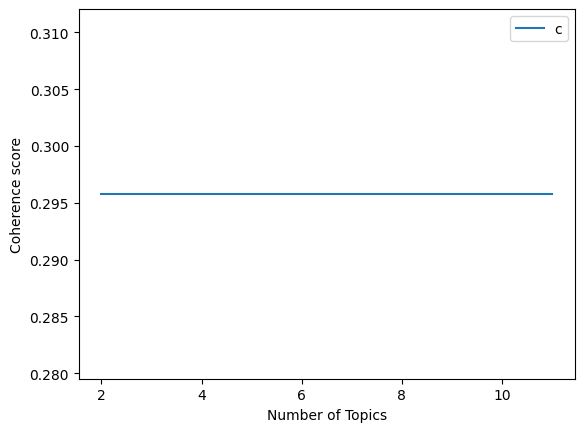

In [30]:
start,stop,step=2,12,1
plot_graph(preprocess_data(data),start,stop,step)

In [31]:
model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '1.000*"review" + -0.000*"rate" + 0.000*"usernam"'), (1, '1.000*"rate" + -0.000*"review" + -0.000*"usernam"'), (2, '1.000*"usernam" + 0.000*"review" + -0.000*"rate"')]


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [32]:
# Write your code here
!pip install pyLDAvis

In [33]:
import nltk
import pyLDAvis

nltk.download('all')
!pip install preprocess

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pyLDAvis.enable_notebook()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [34]:
import numpy as np
top_word_count = 10
top_words_per_topic = {}
#Loop through every topics and their associated words.
for topic_index, row in df.iterrows():
    words_associated = row['review']
    top_words_indices = np.argsort(words_associated)[::-1][:top_word_count]
    top_words_list = [row['review'].split(',')[i].strip()[:35] for i in top_words_indices]
    message = f"Topic {topic_index} top words: {', '.join(top_words_list)}"
    print(message)
    #store the top words for the current topic in the dictionary.
    top_words_per_topic[topic_index] = top_words_list

Topic 0 top words: I had the rather intense privilege 
Topic 1 top words: Nobody directs like James Cameron  
Topic 2 top words: You know the feeling when you start
Topic 3 top words: I m not exactly sure when it became
Topic 4 top words: I was waiting for this day for the 
Topic 5 top words: I was lucky to see Avatar at a pre 
Topic 6 top words: I saw this epic last night at the E
Topic 7 top words: First of all  let me get it out of 
Topic 8 top words: Twelve years later  Titanic creator
Topic 9 top words: Let me preface this by saying I am 
Topic 10 top words: Forgive me  I m going to jump from 
Topic 11 top words: I did see Avatar for the first time
Topic 12 top words: Well  I just saw Avatar this mornin
Topic 13 top words: A film with the scope of James Came
Topic 14 top words: It has been  years since Cameron un
Topic 15 top words: Hatts of to JAMES CAMERON for think
Topic 16 top words: I am sure my comment will be lost i
Topic 17 top words: Avatar  is not the next  Star Wars 
To

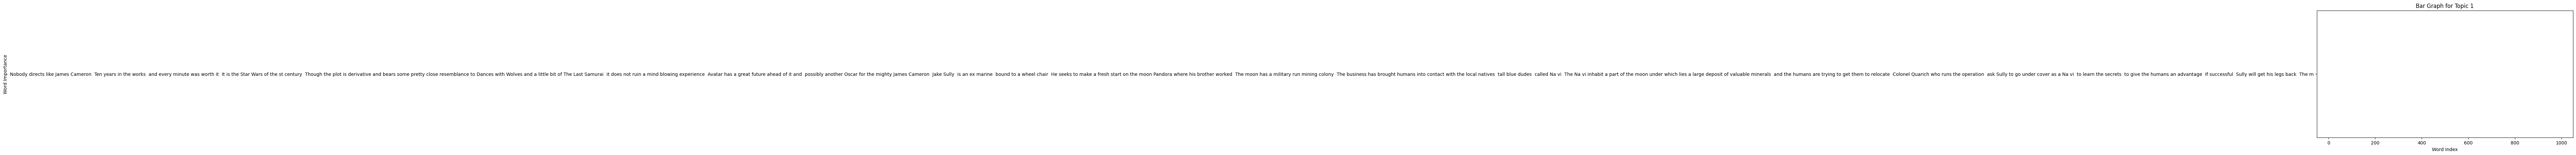

In [36]:
import matplotlib.pyplot as plt

topic_index = 1

num_words_to_plot = 1000

topic_words = df.review.tolist()[topic_index][:num_words_to_plot]
plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_words)), topic_words)
plt.title(f"Bar Graph for Topic {topic_index}")
plt.xlabel("Word Index")
plt.ylabel("Word Importance")
plt.show()

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [37]:
# Write your code here
!pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


In [40]:
from bertopic import BERTopic
import pandas as xy
df = xy.read_csv("https://raw.githubusercontent.com/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/main/imdb_reviews.csv")  #Load the CSV file
b_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)   # Create a BERTopic model with specific configuration settings
t_vectors, t_probs = b_model.fit_transform(df['review'])
t_info = b_model.get_topic_info()
t_info_display = t_info.head(20).to_string()
print(t_info_display)

2024-11-04 04:28:25,628 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 04:31:30,316 - BERTopic - Embedding - Completed ✓
2024-11-04 04:31:30,317 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 04:31:45,706 - BERTopic - Dimensionality - Completed ✓
2024-11-04 04:31:45,708 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 04:31:45,808 - BERTopic - Cluster - Completed ✓
2024-11-04 04:31:45,830 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 04:31:46,211 - BERTopic - Representation - Completed ✓


    Topic  Count                       Name                                             Representation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
The four commonly used topic modeling algorithms are:
1.Latent Dirichlet Allocation (LDA)
2.Nonnegative Matrix Factorization
3.LSA (Latent Semantic Analysis)
4.BERTopic
1. Latent Dirichlet Allocation (LDA)
Advantages:
LDA provides a probabilistic approach to view the distribution of topics over documents and words over topics.
Coherence scores: LDA has high values on topic coherence-semantical similarity of words within a topic.
Wide Usage: With numerous implementations and tools for adjusting parameters, LDA is a well-researched and extensively utilized method.
Disadvantages:
Hyperparameter Sensitivity: To obtain relevant topics, LDA necessitates meticulous adjustment of the hyperparameters (number of topics, alpha, and beta).
Resource intensive: LDA can be slow for large datasets.

2. Non-Negative Matrix Factorization (NMF) Deterministic:
Advantages:
It will have the same outputs given the same input with this approach. In comparison, LDA can lead to different outcomes on numerous occasions.
Simplicity: NMF is quite easy to understand and use.
Sparse Representation: Text mining frequently involves sparse data, which NMF can manage effectively.
Disadvantages
Interpretability: Because NMF relies solely on linear algebraic decomposition, its themes may occasionally be more difficult to understand than those produced by LDA.
The parameter Sensitivity: NMF necessitates careful topic selection, just like LDA.

3. Latent Semantic Analysis (LSA)
Advantages:
Making conceptual clusters: SVD is used in LSA to basically identify and find the conceptual clusters in the text.
Dimensionality Reduction: By reducing the dimensionality of data, LSA may assist in exposing the auxiliary organization of the data.
Disadvantages:
Assumption of Linear Relationship: LSA assumes linear relationship between words which is not necessarily true when it comes to semantic structure of the language.
Noise Sensitivity: Data noise may have an effect on the caliber of topics generated by LSA.

4. BERTopic
Advantages:
Contextual Understanding: By capturing word context through transformers and embeddings, BERTopic can produce subjects that are more meaningful and cohesive.
Dynamic Topic Modeling: Topics can change over time with BERTopic's dynamic topic modeling feature.
Usability: Integrating BERTopic with contemporary NLP pipelines is quite simple.
Disadvantages:
Computationally Intensive: BERTopic can be costly to compute, particularly when dealing with complicated transformer models and big datasets.
Interpretability of Embeddings: Although the subjects may be more logical, it may be difficult to comprehend the embeddings and how they change.

Contextual consistency and interpretability:

High coherence scores and interpretable subjects are frequently the results of LDA.
Because BERTopic uses contextual embeddings, it is able to generate topics that are extremely coherent.
Compared to LDA and BERTopic, NMF and LSA can occasionally generate less cohesive topics.
Efficiency and Scalability:

Compared to LDA, NMF and LSA are typically faster and more effective.
Because BERTopic uses transformers, it may use additional resources.
Adaptability and Flexibility:

More versatility is provided by BERTopic's dynamic topic modeling.
Retraining is necessary for LDA and NMF to adjust to new data because they are more static.
Adequacy for Big Datasets:

Large datasets are typically more suitable for NMF and LSA due to their higher processing efficiency.
Although BERTopic offers richer contextual subjects, it could demand more processing power.


Conclusion
Which one is "better" really depends on what one wants from the algorithm, that is:

LDA for a probabilistic approach and interpretability.
NMF allows one to reach the same result in a deterministic manner and, somehow in a simpler fashion.
LSA is one of the best options when dealing with conceptual clustering and dimensionality reduction.
BERTopic remains very promising when it comes to capturing contextual meanings and evolving topics over time.
BERTopic could be the best choice for high coherence and rich contextual topics. NMF or LSA could be a better choice if one wants to be efficient and simple. LDA remains a strong contender due to it being well-established and probabilistic.
'''


'\nThe four commonly used topic modeling algorithms are:\n1.Latent Dirichlet Allocation (LDA)\n2.Nonnegative Matrix Factorization\n3.LSA (Latent Semantic Analysis)\n4.BERTopic\n1. Latent Dirichlet Allocation (LDA)\nAdvantages:\nLDA provides a probabilistic approach to view the distribution of topics over documents and words over topics.\nCoherence scores: LDA has high values on topic coherence-semantical similarity of words within a topic.\nWide Usage: With numerous implementations and tools for adjusting parameters, LDA is a well-researched and extensively utilized method.\nDisadvantages:\nHyperparameter Sensitivity: To obtain relevant topics, LDA necessitates meticulous adjustment of the hyperparameters (number of topics, alpha, and beta).\nResource intensive: LDA can be slow for large datasets. \n\n2. Non-Negative Matrix Factorization (NMF) Deterministic: \nAdvantages:\nIt will have the same outputs given the same input with this approach. In comparison, LDA can lead to different ou

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

This assignment took much time to analyze the topics and understanding it. As this gave an interesting ideas in
Models and algorithms that how we can able to utilze in programming. As I experienced few of the problems were easily
understandable and few are hard to understand. This is where the time consumption is more that I have put into the assignment.
I have done this exercise with the links provided in this assignment which helped me to complete the assignment.
And I have learned the algorithms and its implementation that I can perform in coding.
The only challenges I faced it that the initial point of from where do I need to start the process and get the detailed
understanding of algorithms. And I tried my best for the Question 3 as It giving me multiple library errors and failing in many stages as I got
it that it will take too much of time and then I shifted to the alternative question 3.

the practice of creating and displaying topics using models such as LDA and BERTopic is extremely relevant to the study of natural language processing (NLP):
1.Topic Modeling: One of the most important NLP techniques for examining vast amounts of text data is topic modeling. Researchers and practitioners can find patterns, themes, and underlying structures in the data by extracting topics from texts. This is important for applications like:
  Document Classification: Documents can be categorized into predetermined groups by having a clear understanding of their primary themes.
  Information Retrieval: By matching user queries with pertinent topics, topic modeling can enhance search engine results.

2.Data-Informed Choice Making Informed Decisions: Organizations can use topic modeling and data visualization to help them make better data-driven decisions.
 This is especially usually in:
 Content Strategy: Creating focused content can be aided by knowing what subjects appeal to viewers.
 Policy Making: By examining issues in public discourse, policymakers can learn about the interests and concerns of their people.

The process of creating and displaying topics using LDA and BERTopic is intricately linked to the ideas and methods of natural language processing.
It improves our capacity for textual analysis and interpretation, advances our knowledge of language, and has important ramifications for a wide range of domains and applications.
Anyone working with text data will need to learn these skills as NLP develops further.
I want to get expertise in the NLP in future.


'''

'\nPlease write you answer here:\n\nThis assignment took much time to analyze the topics and understanding it. As this gave an interesting ideas in \nModels and algorithms that how we can able to utilze in programming. As I experienced few of the problems were easily \nunderstandable and few are hard to understand. This is where the time consumption is more that I have put into the assignment.\nI have done this exercise with the links provided in this assignment which helped me to complete the assignment.\nAnd I have learned the algorithms and its implementation that I can perform in coding.\nThe only challenges I faced it that the initial point of from where do I need to start the process and get the detailed \nunderstanding of algorithms. And I tried my best for the Question 3 as It giving me multiple library errors and failing in many stages as I got\nit that it will take too much of time and then I shifted to the alternative question 3.\n\nthe practice of creating and displaying to